In [1]:
import torch
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam

# Definición de la función de Legendre
def legendre(n, x):
    if n == 0:
        return torch.ones_like(x)
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

# Definición de la función que evalúa la serie de Legendre 2-D
def evaluate_legendre_series(x, y, coefficients):
    sum = torch.zeros_like(x)
    n = int(torch.sqrt(torch.tensor(coefficients.numel()).float()))  # Convert to tensor before sqrt
    for i in range(n):
        for j in range(n):
            sum += coefficients[i * n + j] * legendre(i, x) * legendre(j, y)
    return sum

In [18]:
# Definición de la función de Legendre
def legendre(n, x):
    if n == 0:
        return torch.ones_like(x)
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

#Definición de la función que evalúa la serie de Legendre 2-D
def evaluate_legendre_series(x, y, coefficients):
    sum = torch.zeros_like(x)
    n = int(torch.sqrt(torch.tensor(coefficients.numel()).float()))  # Convert to tensor before sqrt
    for i in range(n):
        for j in range(n):
            sum += coefficients[i * n + j] * legendre(i, x) * legendre(j, y)
    return sum
 
 
# Define the function for which you want to calculate the Legendre series coefficients
def f(x1, x2):
    return torch.sin(x1) * torch.cos(x2) + 0.5 * torch.cos(2*x1) * torch.cos(2*x2) + 0.25 * torch.cos(4*x1) * torch.cos(4*x2)


# Define the error function
def error_function(coefficients):
    approximation = evaluate_legendre_series(X1, X2, coefficients)
    error = torch.sum((f(X1, X2) - approximation) ** 2)
    return error

# Choose an initial guess for the coefficients
N = 5  # Maximum degree of the Legendre polynomials
initial_guess = torch.zeros(N * N, requires_grad=True)  # Initial guess for the coefficients

# Input data for the function and the Legendre polynomials
X1, X2 = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))

# Import the LBFGS optimizer
from torch.optim import LBFGS

# Use an optimization function to minimize the error function with respect to the coefficients
optimizer = LBFGS([initial_guess], lr=1)

def closure():
    optimizer.zero_grad()
    loss = error_function(initial_guess)
    loss.backward()
    return loss

for _ in range(2):  # Number of optimization steps
    optimizer.step(closure)

# Optimal coefficients found
optimal_coefficients = initial_guess.detach()
optimal_coefficients

tensor([ 1.1246e-01, -9.7582e-10, -1.5912e-01, -2.3407e-10, -2.4156e-02,
         7.6030e-01, -9.3483e-10, -2.8026e-01, -2.4114e-09,  8.2137e-03,
        -1.5912e-01, -8.7600e-10,  9.7633e-01, -2.5243e-09, -4.4736e-01,
        -5.2993e-02,  2.0784e-09,  1.9534e-02, -8.3917e-10, -5.7327e-04,
        -2.4156e-02,  9.2485e-10, -4.4736e-01,  2.2239e-10,  3.1388e-01])

In [3]:
# Calculate the final loss
final_loss = error_function(optimal_coefficients)

print("Final loss:")
print("{:.2e}".format(final_loss.item()))

Final loss:
5.40e-08


/tmp/ipykernel_1168/2897535089.py:13: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax1.contourf(X1.numpy(), X2.numpy(), Z1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  # Convert X1 and X2 to numpy for plotting
/tmp/ipykernel_1168/2897535089.py:18: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax2.contourf(X1.numpy(), X2.numpy(), Z2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  # Convert X1 and X2 to numpy for plotting


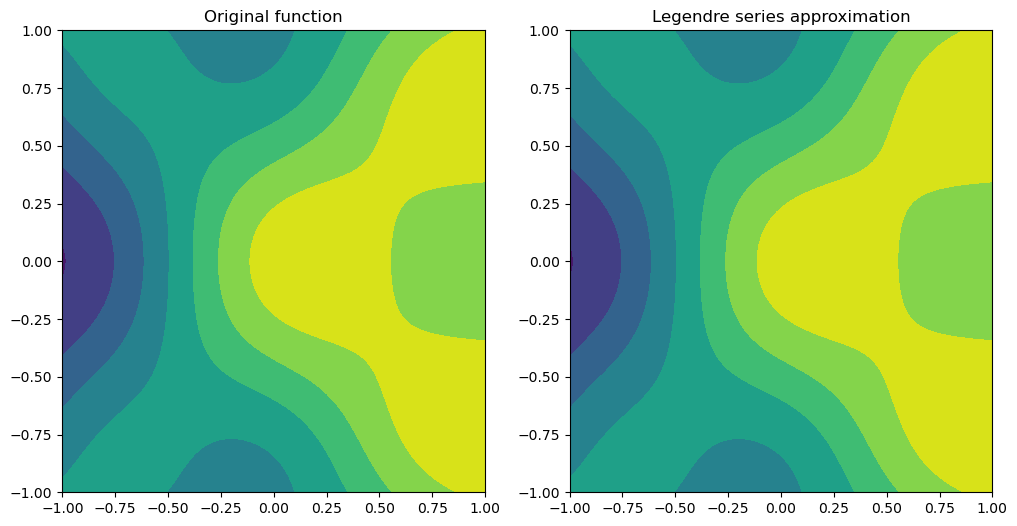

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the values of the function and the Legendre series approximation at the points
Z1 = f(X1, X2).detach().numpy()  # Convert to numpy for plotting
Z2 = evaluate_legendre_series(X1, X2, optimal_coefficients).detach().numpy()  # Convert to numpy for plotting

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))

# Plot the function
ax1 = fig.add_subplot(121)
ax1.contourf(X1.numpy(), X2.numpy(), Z1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  # Convert X1 and X2 to numpy for plotting
ax1.set_title('Original function')

# Plot the Legendre series approximation
ax2 = fig.add_subplot(122)
ax2.contourf(X1.numpy(), X2.numpy(), Z2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')  # Convert X1 and X2 to numpy for plotting
ax2.set_title('Legendre series approximation')

# Display the plot
plt.show()

/tmp/ipykernel_1168/3000734673.py:78: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  plt.contourf(X1, X2, approximation.cpu().numpy(), cmap='viridis', edgecolor='none')


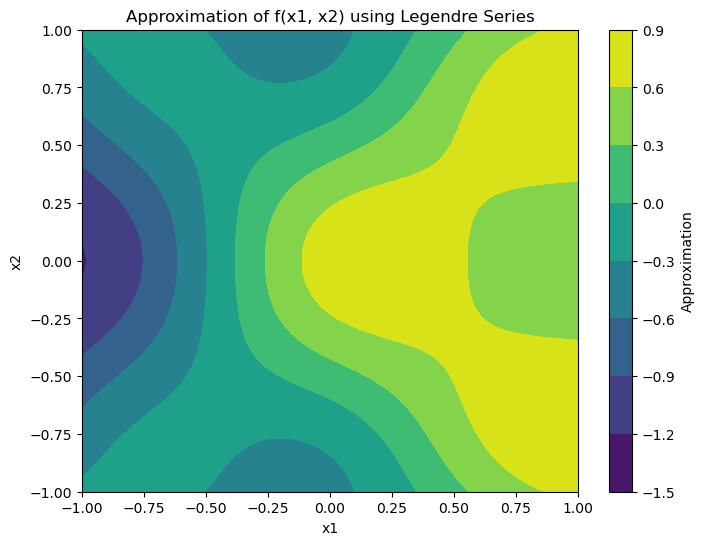

Optimal Coefficients:
tensor([ 1.1230e-01, -3.6005e-08, -1.6022e-01,  7.7403e-07, -2.4364e-02,
        -4.6469e-07,  9.5116e-03, -5.9058e-07, -9.7175e-04, -2.2953e-07,
         5.1196e-05, -2.7105e-07, -3.5027e-06, -2.8815e-07, -1.6506e-06,
         7.6027e-01, -1.7679e-07, -2.8025e-01,  4.2718e-08,  8.2210e-03,
        -1.3688e-08, -8.3954e-05, -1.0037e-08,  3.5172e-07, -1.1421e-08,
         7.0261e-10,  4.9596e-09, -1.7397e-07, -1.3552e-08, -1.1244e-07,
        -1.6022e-01,  1.0531e-07,  9.6935e-01,  4.4020e-09, -4.5106e-01,
        -1.1937e-08,  8.1068e-02, -4.3500e-08, -7.3210e-03,  3.5112e-08,
         3.8815e-04,  3.2578e-08, -1.4993e-05,  6.2440e-08,  9.1030e-08,
        -5.3052e-02,  3.5520e-09,  1.9556e-02,  9.0865e-09, -5.7330e-04,
         7.4380e-09,  6.2691e-06, -7.5443e-10,  1.4679e-07,  6.8483e-09,
         1.6143e-07,  4.1065e-09,  3.1787e-07,  2.0753e-09,  8.6863e-08,
        -2.4359e-02,  3.0255e-08, -4.5106e-01,  1.5858e-08,  3.2389e-01,
        -3.9729e-09, -6.4132e

In [58]:
import torch
import matplotlib.pyplot as plt

# Definición de la función de Legendre
def legendre(n, x):
    if n == 0:
        return torch.ones_like(x)
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

# Precomputación de los polinomios de Legendre hasta el grado N
def precompute_legendre(N, x):
    leg_polynomials = torch.zeros((N + 1, *x.shape), dtype=x.dtype, device=x.device)
    leg_polynomials[0] = torch.ones_like(x)
    if N > 0:
        leg_polynomials[1] = x

    for n in range(2, N + 1):
        leg_polynomials[n] = ((2.0 * n - 1.0) * x * leg_polynomials[n - 1] - (n - 1) * leg_polynomials[n - 2]) / n

    return leg_polynomials

# Evaluación de la serie de Legendre 2-D utilizando broadcasting
def evaluate_legendre_series(x, y, coefficients):
    n = int(torch.sqrt(torch.tensor(coefficients.numel()).float()))  # Convert to tensor before sqrt
    leg_x = torch.stack([legendre(i, x) for i in range(n)], dim=0)
    leg_y = torch.stack([legendre(j, y) for j in range(n)], dim=0)
    coefficients = coefficients.view(n, n)
    
    # Utilizando broadcasting para calcular la serie de Legendre
    result = torch.sum(coefficients[:, :, None, None] * leg_x[:, None, :, :] * leg_y[None, :, :, :], dim=(0, 1))
    
    return result

# Define the function for which you want to calculate the Legendre series coefficients
def f(x1, x2):
    return torch.sin(x1) * torch.cos(x2) + 0.5 * torch.cos(2*x1) * torch.cos(2*x2) + 0.25 * torch.cos(4*x1) * torch.cos(4*x2)

# Define the error function
def error_function(coefficients):
    approximation = evaluate_legendre_series(X1, X2, coefficients)
    error = torch.sum((f(X1, X2) - approximation) ** 2)
    return error

# Choose an initial guess for the coefficients
N = 15  # Maximum degree of the Legendre polynomials
initial_guess = torch.zeros(N * N, requires_grad=True)  # Initial guess for the coefficients

# Input data for the function and the Legendre polynomials
X1, X2 = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))

# Import the LBFGS optimizer
from torch.optim import LBFGS

# Use an optimization function to minimize the error function with respect to the coefficients
optimizer = LBFGS([initial_guess], lr=1)

def closure():
    optimizer.zero_grad()
    loss = error_function(initial_guess)
    loss.backward()
    return loss

# Perform optimization steps
for _ in range(2):  # Number of optimization steps
    optimizer.step(closure)

# Optimal coefficients found
optimal_coefficients = initial_guess.detach()

# Evaluate the Legendre series approximation
approximation = evaluate_legendre_series(X1, X2, optimal_coefficients)

# Plotting the result using contourf
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, approximation.cpu().numpy(), cmap='viridis', edgecolor='none')
plt.colorbar(label='Approximation')
plt.title('Approximation of f(x1, x2) using Legendre Series')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print("Optimal Coefficients:")
print(optimal_coefficients)


/tmp/ipykernel_1168/2723158812.py:82: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  plt.contourf(X1, X2, approximation.cpu().numpy(), cmap='viridis', edgecolor='none')


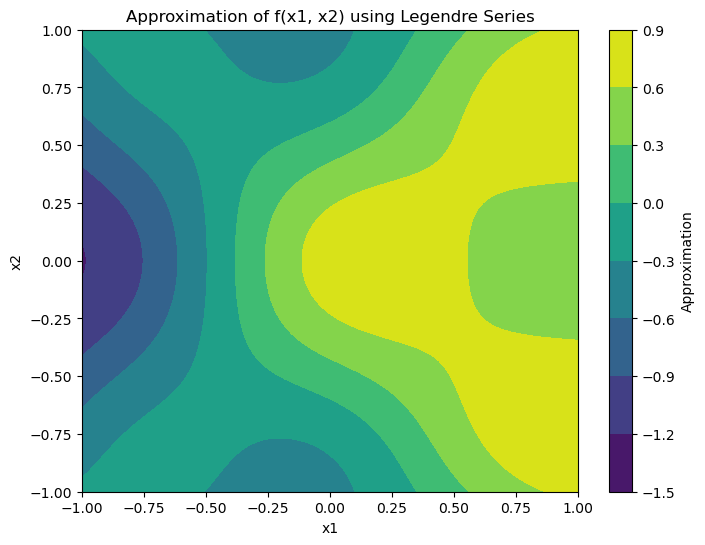

Optimal Coefficients:
tensor([ 1.1230e-01, -3.3716e-08, -1.6022e-01,  1.2465e-07, -2.4362e-02,
         2.3280e-08,  9.5138e-03,  1.5990e-08, -9.6911e-04,  3.5708e-08,
         5.2780e-05,  2.4377e-08, -1.9278e-06,  1.5663e-09, -1.5063e-08,
         3.1776e-08,  3.6742e-08,  1.7218e-08,  2.3110e-07,  2.7529e-08,
         7.6027e-01,  3.2881e-08, -2.8025e-01, -1.8900e-08,  8.2211e-03,
        -3.4745e-08, -8.3968e-05, -4.1950e-09,  3.0009e-07, -3.5509e-09,
         2.2723e-07,  4.4748e-09,  2.2399e-07,  1.6149e-08, -1.2069e-07,
         4.8689e-09, -2.1553e-07, -6.6672e-09, -1.4854e-07, -6.4389e-09,
        -1.6022e-01,  1.3570e-08,  9.6935e-01, -2.5842e-08, -4.5106e-01,
        -2.2379e-08,  8.1070e-02, -6.0449e-09, -7.3212e-03, -7.6943e-09,
         3.8876e-04,  2.1934e-08, -1.3793e-05, -6.8720e-09,  3.7791e-07,
         7.6393e-09,  1.4367e-07, -5.7246e-10, -2.8014e-07, -3.1434e-09,
        -5.3051e-02,  1.2753e-08,  1.9556e-02, -8.7134e-09, -5.7367e-04,
         1.2929e-08,  5.8188e

In [70]:
import torch
import matplotlib.pyplot as plt

# Definición de la función de Legendre
def legendre(n, x):
    if n == 0:
        return torch.ones_like(x)
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n
 

# Evaluación de la serie de Legendre 2-D utilizando broadcasting
def evaluate_legendre_series(x, y, coefficients, leg_x, leg_y):
    n = int(torch.sqrt(torch.tensor(coefficients.numel()).float()))  # Convert to tensor before sqrt
    coefficients = coefficients.view(n, n)
    
    # Utilizando broadcasting para calcular la serie de Legendre
    result = torch.sum(coefficients[:, :, None, None] * leg_x[:, None, :, :] * leg_y[None, :, :, :], dim=(0, 1))
    
    return result

# Define the function for la cual quieres calcular los coeficientes de la serie de Legendre
def f(x1, x2):
    return torch.sin(x1) * torch.cos(x2) + 0.5 * torch.cos(2*x1) * torch.cos(2*x2) + 0.25 * torch.cos(4*x1) * torch.cos(4*x2)

# Define la función de error
def error_function(coefficients, leg_x, leg_y):
    approximation = evaluate_legendre_series(X1, X2, coefficients, leg_x, leg_y)
    error = torch.sum((f(X1, X2) - approximation) ** 2)
    return error

# Elige una suposición inicial para los coeficientes
N = 20  # Grado máximo de los polinomios de Legendre
initial_guess = torch.zeros(N * N, requires_grad=True)  # Suposición inicial para los coeficientes

# Datos de entrada para la función y los polinomios de Legendre
X1, X2 = torch.meshgrid(torch.linspace(-1, 1, 100), torch.linspace(-1, 1, 100))
 
# Importar el optimizador LBFGS
from torch.optim import LBFGS

# Usar una función de optimización para minimizar la función de error con respecto a los coeficientes
optimizer = LBFGS([initial_guess], lr=1)

# Precomputar leg_x y leg_y una vez
n = int(torch.sqrt(torch.tensor(initial_guess.numel()).float()))
leg_x = torch.stack([legendre(i, X1) for i in range(n)], dim=0)
leg_y = torch.stack([legendre(j, X2) for j in range(n)], dim=0)

def closure():
    optimizer.zero_grad()
    loss = error_function(initial_guess, leg_x, leg_y)
    loss.backward()
    return loss

# Realizar pasos de optimización
for _ in range(2):  # Número de pasos de optimización
    optimizer.step(closure)

# Coeficientes óptimos encontrados
optimal_coefficients = initial_guess.detach()

# Evaluar la aproximación de la serie de Legendre
approximation = evaluate_legendre_series(X1, X2, optimal_coefficients, leg_x, leg_y)

# Graficar el resultado usando contourf
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, approximation.cpu().numpy(), cmap='viridis', edgecolor='none')
plt.colorbar(label='Approximation')
plt.title('Approximation of f(x1, x2) using Legendre Series')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print("Optimal Coefficients:")
print(optimal_coefficients)
